In [212]:
import numpy as np
import sklearn
import matplotlib.pyplot as plt

In [213]:
def f(x):
    return -0.5 + 2*x - 4*x**2 + 2*x**3 + .2 * x**4 

In [233]:
x = np.arange(-5,5,.4)
x_fine = np.arange(-5,4.5,.05)
M = len(x)
y = f(x) + np.random.normal(0,20,M)
y_test = f(x) + np.random.normal(0,20,M)

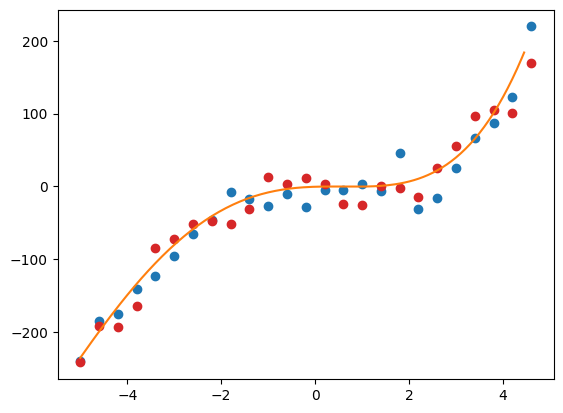

In [250]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.scatter(x, y, color='tab:blue')
ax.scatter(x, y_test, color='tab:red')
ax.plot(x_fine, f(x_fine), color='tab:orange')

In [216]:
J = sum((y-f(x))**2)/M
J

466.38147967567625

In [234]:
J_test = sum((y_test-f(x))**2)/M
J

410.58437340748026

In [ ]:
X = []
for x_i in x:
    wide_x = []
    for i in range(20):
        wide_x.append( x_i**i )
    X.append( wide_x )

In [217]:
X = [ [x_i**i for i in range(20)] for x_i in x]

In [218]:
from sklearn import linear_model
reg = linear_model.LinearRegression()
reg.fit(X,y)

LinearRegression()

In [219]:
reg.coef_

array([ 0.00000000e+00,  6.21576194e+01,  7.44118709e+01, -1.03966770e+02,
       -8.40405788e+01,  6.47972825e+01,  3.40305698e+01, -1.90904997e+01,
       -7.09382882e+00,  3.13627109e+00,  8.81058295e-01, -3.03193961e-01,
       -6.86535690e-02,  1.72093461e-02,  3.30241491e-03, -5.39154626e-04,
       -8.93158938e-05,  7.76682894e-06,  1.03237497e-06, -2.51483449e-08])

In [220]:
reg.intercept_

-19.990996480258218

In [221]:
reg.score(X,y)

0.9936467130691115

In [222]:
def H(x,coefs,intercept):
    res = 0
    for i in range(20):
        res += coefs[i]*x**i
    res += intercept
    return res

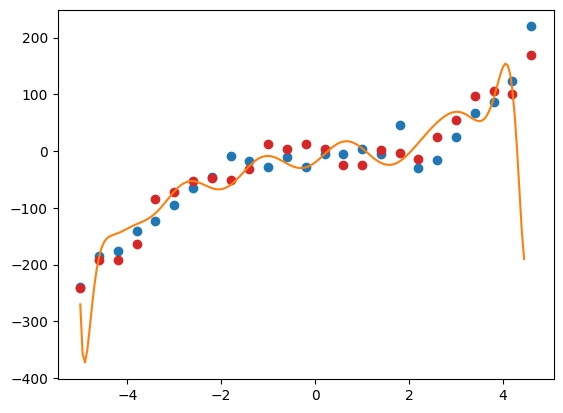

In [251]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.scatter(x, y, color='tab:blue')
ax.scatter(x, y_test, color='tab:red')
ax.plot(x_fine, H(x_fine,reg.coef_,reg.intercept_), color='tab:orange')

In [224]:
J = sum((y-H(x,reg.coef_,reg.intercept_))**2)/M
J

62.99874442732808

In [235]:
J_test = sum((y_test-H(x,reg.coef_,reg.intercept_))**2)/M
J_test

749.6480557489247

In [243]:
from sklearn import linear_model
ridge = linear_model.Ridge(alpha=0.5)
ridge.fit(X,y)

/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=1.06827e-27): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Ridge(alpha=0.5)

In [244]:
ridge.coef_

array([ 0.00000000e+00,  8.43276274e+00, -1.75171072e+00,  1.18837221e-01,
        3.32758585e+00,  1.68540068e-01,  4.65278941e+00,  8.76161809e-01,
       -3.36229917e+00, -6.08322930e-01,  8.04728928e-01,  1.50810056e-01,
       -9.42708983e-02, -1.81877678e-02,  5.87445814e-03,  1.15554208e-03,
       -1.86886567e-04, -3.72111164e-05,  2.38717453e-06,  4.78786581e-07])

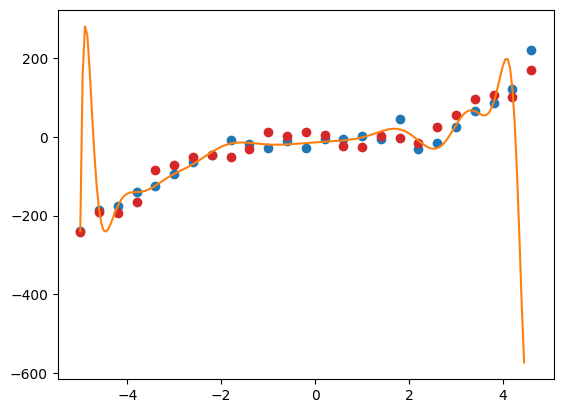

In [252]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.scatter(x, y, color='tab:blue')
ax.scatter(x, y_test, color='tab:red')
ax.plot(x_fine, H(x_fine,ridge.coef_,ridge.intercept_), color='tab:orange')

In [246]:
J = sum((y-H(x,ridge.coef_,ridge.intercept_))**2)/M
J

90.00988067140031

In [247]:
J_test = sum((y_test-H(x,ridge.coef_,ridge.intercept_))**2)/M
J_test

661.1198579465598

In [238]:
from sklearn import linear_model
lasso = linear_model.Lasso(alpha=0.5)
lasso.fit(X,y)

/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.012e+03, tolerance: 2.373e+01
  model = cd_fast.enet_coordinate_descent(


Lasso(alpha=0.5)

In [239]:
lasso.coef_

array([ 0.00000000e+00,  1.30051001e-01, -2.03912738e+00,  1.88923859e+00,
       -2.41206443e-01,  4.15665911e-02,  1.87254607e-02, -5.59651112e-04,
        9.18966209e-05, -6.92006031e-05, -7.47115651e-06, -2.18878422e-06,
       -2.44508474e-07, -2.43309186e-08, -7.75472490e-10,  1.62217484e-09,
        3.35979751e-10,  1.46880449e-10,  2.47261123e-11,  8.08500066e-12])

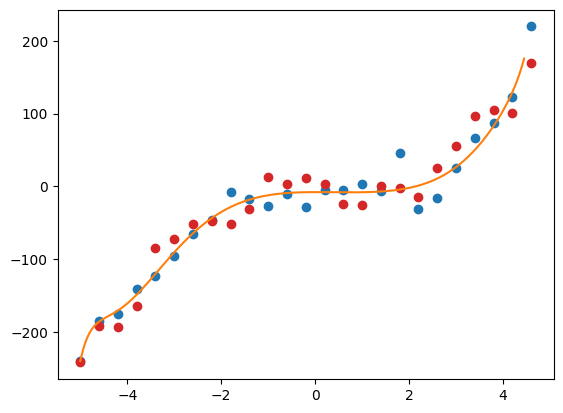

In [253]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.scatter(x, y, color='tab:blue')
ax.scatter(x, y_test, color='tab:red')
ax.plot(x_fine, H(x_fine,lasso.coef_,lasso.intercept_), color='tab:orange')

In [241]:
J = sum((y-H(x,lasso.coef_,lasso.intercept_))**2)/M
J

236.57074525168744

In [242]:
J_test = sum((y_test-H(x,lasso.coef_,lasso.intercept_))**2)/M
J_test

490.08098895336377